## Introduction

In this notebook, we are going to explore and analyze data of World Happiness Report. Full description of this dataset can be seen at https://www.kaggle.com/unsdsn/world-happiness. In this dataset, every country in the world are surveyed and ranked by their happiness score. There are 6 factors which might affect the happiness level of a country: GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. 

The aim of this project is to find the factor(s) which mostly affect the happiness score of a country based on data analysis. Note that the aim is not to produce a good model to predict happiness score of a country, hence cross validation is not necessarily needed. We will use the dataset from 2019 report. 

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Download dataset from shared google drive file.

In [2]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
import os
gdd.download_file_from_google_drive(file_id='1GeBk8GO6-DE0UH57rQgKxLVpARgl_UHn',
                                    dest_path='./world_happiness.zip',
                                    unzip=True)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
df1 = pd.read_csv('happy2019.csv')
df1 = df1.rename(columns={"Country or region": "Country"})
df1

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


The countries in this dataset are already ranked based on the happiness score. We can see that the top 5 happiest countries in the world are in the region of Europe, while the 5 lowest score countries are in the region of Africa. 

## Regional Analysis

Next, we will look the overall mean happiness score over the region where each country are belong to. The region information of each country doesn't exist in 2019 report, but it does exist in 2015 report so we can obtain the information by using outer join between those 2 datasets. 

In [4]:
df2 = pd.read_csv('happy2015.csv')
df = pd.merge(df1, df2, on='Country', how='left')
df.drop(df.columns[10:],axis=1,inplace=True)
df = df.rename(columns={"Generosity_x": "Generosity"})
cols = ['Overall rank','Country','Region','Score','GDP per capita','Social support','Healthy life expectancy',
        'Freedom to make life choices','Generosity','Perceptions of corruption']
df = df[cols]
df

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Text(0.5, 1.0, 'Mean Happiness Score in Each Region (2019)')

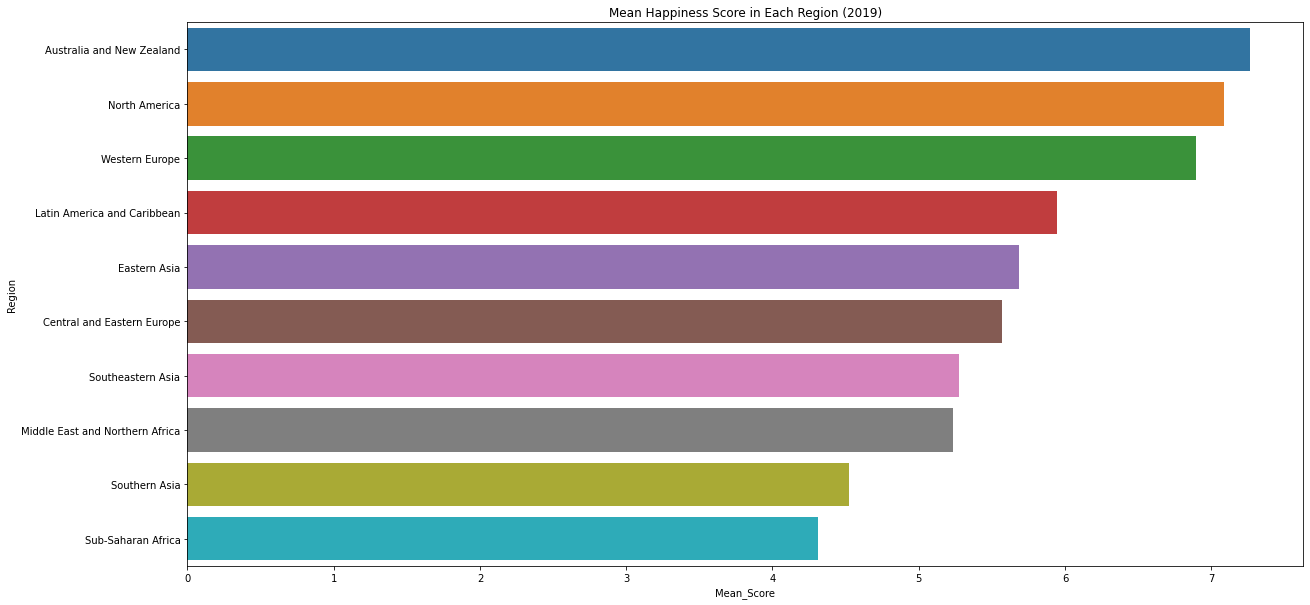

In [5]:
by_region = df.groupby('Region').agg(Mean_Score=('Score', 'mean')).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Mean_Score', y='Region', data=by_region.sort_values(by='Mean_Score',ascending=False))
plt.title('Mean Happiness Score in Each Region (2019)')

We can see that Western Europe region is on the 3rd place. Higher mean score of Australia and North America region are due to the fact that these 2 regions only consist of 2 countries, each with relatively high score.  

In [6]:
df[df['Region']=='Australia and New Zealand']

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,8,New Zealand,Australia and New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.38
10,11,Australia,Australia and New Zealand,7.228,1.372,1.548,1.036,0.557,0.332,0.29


In [7]:
df[df['Region']=='North America']

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
8,9,Canada,North America,7.278,1.365,1.505,1.039,0.584,0.285,0.308
18,19,United States,North America,6.892,1.433,1.457,0.874,0.454,0.280,0.128


## Analysis and Correlation of the Six Factors

Now we will examine the relation between the happiness score and the other 6 factors by using scatterplot. We also try to fit the relation we seek using linear regression. 

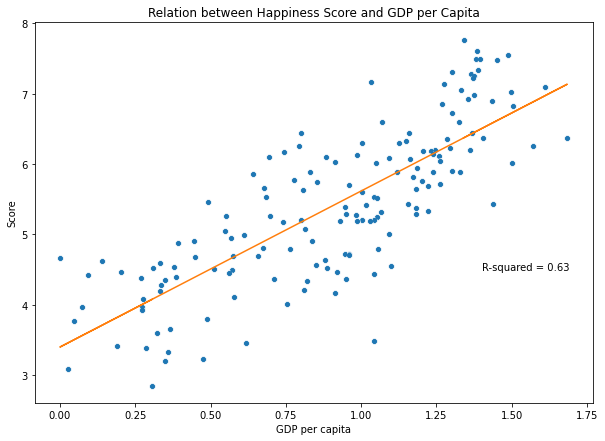

In [25]:
from sklearn.linear_model import LinearRegression
x,y = df['GDP per capita'], df['Score']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Happiness Score and GDP per Capita')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(1.4, 4.5, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

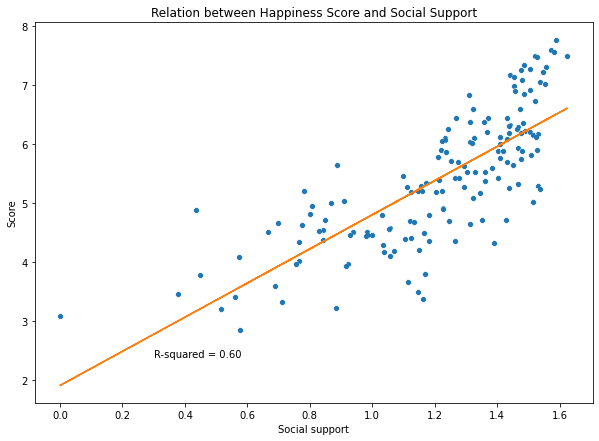

In [20]:
x,y = df['Social support'], df['Score']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Happiness Score and Social Support')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(0.3, 2.4, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

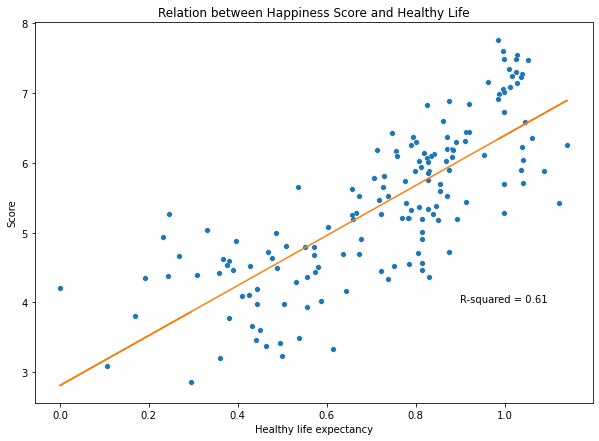

In [21]:
x,y = df['Healthy life expectancy'], df['Score']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Happiness Score and Healthy Life')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(0.9, 4, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

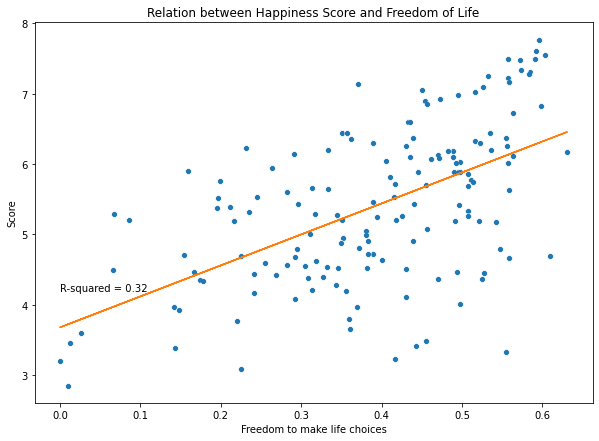

In [24]:
x,y = df['Freedom to make life choices'], df['Score']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Happiness Score and Freedom of Life')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(0, 4.2, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

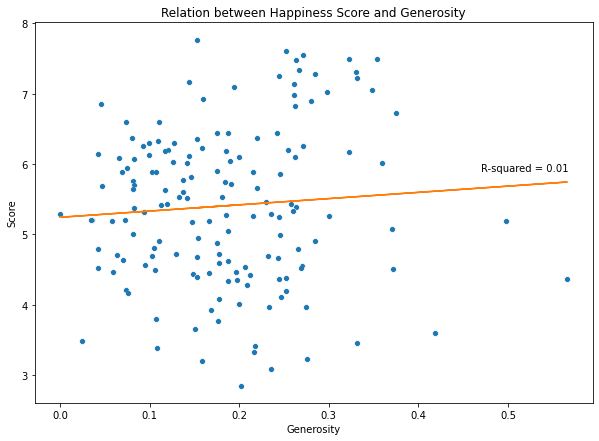

In [29]:
x,y = df['Generosity'], df['Score']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Happiness Score and Generosity')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(0.47, 5.9, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

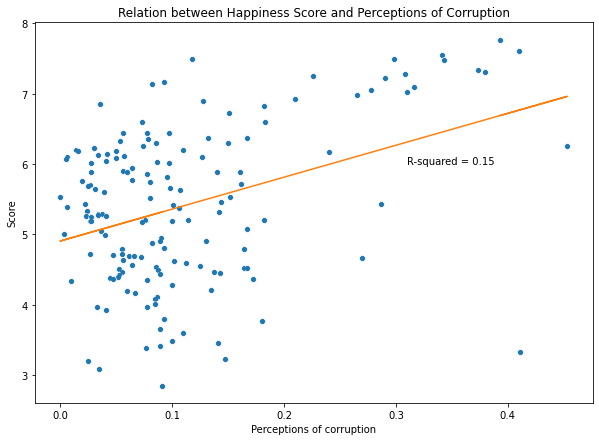

In [30]:
x,y = df['Perceptions of corruption'], df['Score']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Happiness Score and Perceptions of Corruption')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(0.31, 6, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

From the above results, we can see that GDP per capita, social support, and healthy life expectancy have stronger correlation to happiness score compared to the other factors. From here, we can expect that a country which has high economic growth, good social life in society, and high quality of health system tend to be more 'happy'.

Now, we will explore every correlation between the factors using heatmap of correlation coefficient. Here, we will use Pearson correlation coefficient. 

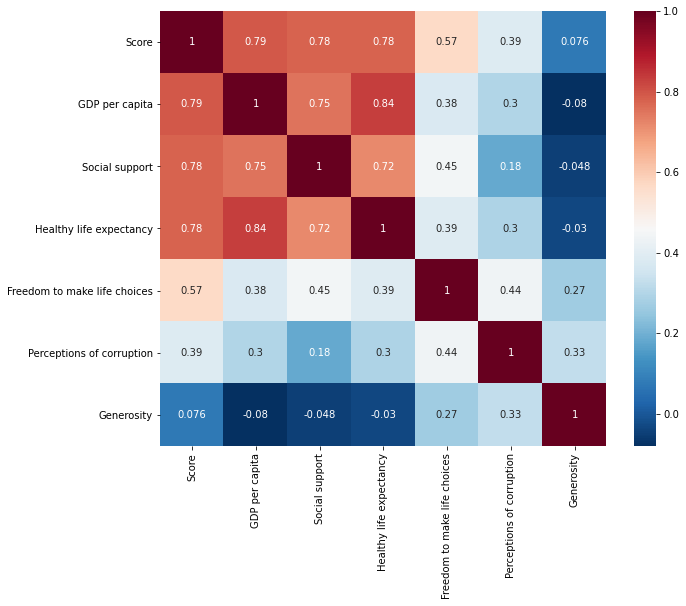

In [14]:
six_vars = df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity']]
plt.figure(figsize=(10,8))
sns.heatmap(six_vars.corr(method='pearson'), cmap = 'RdBu_r', annot = True)
plt.show()

Strong positive correlation between variables are indicated by red colors. We can see that happiness score has strong correlation with GDP per capita, social support, dan healthy life expectancy in accordance to previous analysis. Also note that GDP per capita has strong correlation with healthy life expectancy (as can be seen in the following scatterplot). This means that country with high economic growth tend to have good quality of health system. 

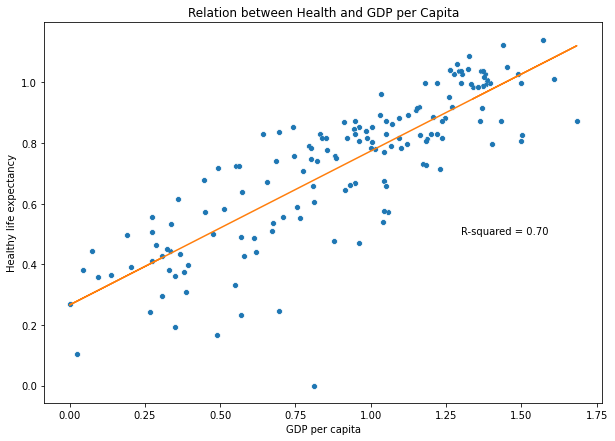

In [32]:
x,y = df['GDP per capita'], df['Healthy life expectancy']
X = np.array(x).reshape(-1,1)
plt.figure(figsize=(10,7))
sns.scatterplot(x, y)
plt.title('Relation between Health and GDP per Capita')

lr = LinearRegression()
lr.fit(X,y)
plt.plot(x, y, '.')
plt.plot(x, lr.intercept_ + lr.coef_ * x, '-')
plt.text(1.3, 0.5, 'R-squared = %0.2f' % lr.score(X,y))
plt.show()

## Feature Importance

We can also obtain the important factors which affect the happiness score by using feature selection method from a certain learning model. Here, we will use multiple linear regression for our model with happiness score as the dependent variable and the other 6 factors as the independent variables. By using SelectKBest from scikit-learn package, we can obtain feature importance score for each independent variable/feature. In addition, R-squared score for the multiple regression is shown. 

In [40]:
X = (six_vars.dropna().iloc[:,1:7])
y = (six_vars.dropna().iloc[:,0])
lr = LinearRegression()
lr.fit(X,y)
print("multiple linear regression R-squared: %f" % (lr.score(X,y)))

multiple linear regression R-squared: 0.779164


1. feature GDP per capita (262.497642)
2. feature Healthy life expectancy (239.075467)
3. feature Social support (234.711030)
4. feature Freedom to make life choices (72.869711)
5. feature Perceptions of corruption (26.899256)
6. feature Generosity (0.890502)


<AxesSubplot:xlabel='features', ylabel='feature score'>

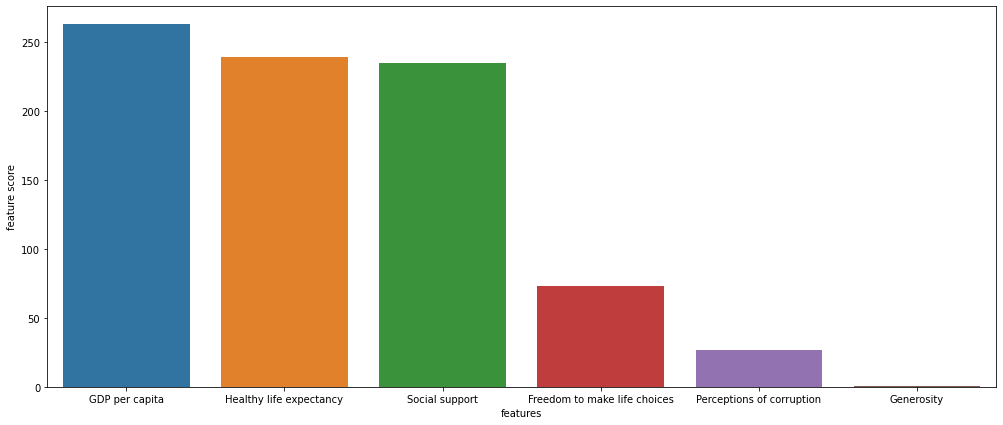

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X,y)
indices = np.argsort(fs.scores_)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, six_vars.columns[indices[f]+1], fs.scores_[indices[f]]))

cc = DataFrame({'feature score':Series(fs.scores_),'features':Series(X.columns)})    
plt.figure(figsize=(17,7))
sns.barplot(y='feature score',x='features',data=cc.sort_values(by='feature score',ascending=False))

We can see that GDP per capita, healthy life expectancy, and social support have much higher feature importance score compared to the other features. Moreover, these 3 factors have importance score which relatively equal in magnitude. Once again, this confirms our previous results. 

For the last approach, we will use feature selection method by using Extra Trees (one variant of tree ensemble methods) for the learning model. By using ExtraTreeRegressor from scikit-learn package, we can obtain feature importance score for each feature. 

1. feature GDP per capita (0.281380)
2. feature Social support (0.270629)
3. feature Healthy life expectancy (0.267527)
4. feature Freedom to make life choices (0.084083)
5. feature Perceptions of corruption (0.064323)
6. feature Generosity (0.032059)


<AxesSubplot:xlabel='features', ylabel='feature score'>

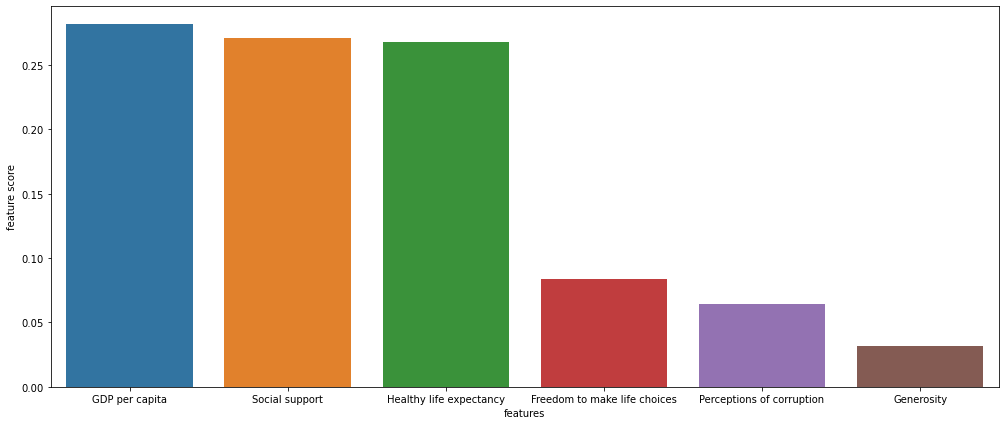

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=100,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, six_vars.columns[indices[f]+1], importances[f]))

cc = DataFrame({'feature score':Series(importances),'features':Series(X.columns)})    
plt.figure(figsize=(17,7))
sns.barplot(y='feature score',x='features',data=cc.sort_values(by='feature score',ascending=False))

We can see that GDP per capita, healthy life expectancy, and social support have much higher feature importance score compared to the other features. Once again, this confirms our previous results. From the 3 top factors, GDP per capita seems to be the most important factor which affects the happiness level of a country.

## Conclusion 

From this all analysis of World Happiness Report using 2019 dataset, we can conclude that there are at least 3 factors which really affect the happiness level of a country: GDP per capita, social support, and healthy life expectancy. From these 3 factors, GDP per capita has the highest impact to happiness score. There is also very strong correlation between GDP per capita and healthy life expectancy.